# Arboles de Decisión

## Preparación del ambiente de trabajo

In [313]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import lec7_graphs as afx   

import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(15, 12)
plt.rcParams["axes.labelsize"] = 14

In [ ]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [314]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


## Feature engineering

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

In [319]:
numeric_cols = df._get_numeric_data().columns

In [326]:
df_num = df[numeric_cols]

In [327]:
df_num.shape

(2930, 35)

In [321]:
nominal_cols = [i for i in df.columns if i not in numeric_cols]

In [322]:
def dummy_generator(df, column_list):
    dummy_df = pd.get_dummies(df, columns=column_list, drop_first=True) 
    return dummy_df

In [323]:
df_dum = dummy_generator(df, nominal_cols).select_dtypes('uint8')

In [324]:
df_dum.shape

(2930, 272)

In [329]:
df_model = pd.concat([df_num, df_dum], axis=1)

In [331]:
df_model.shape

(2930, 307)

## Modelo

In [332]:
y_vec = df_model['Sale_Price']
X_mat = df_model.drop(['Sale_Price'],1)

In [333]:
X_train, X_test, y_train, y_test  = train_test_split(X_mat,y_vec,test_size = .3,random_state = 11)

In [334]:
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [335]:
print("Test MSE:", mean_squared_error(y_test,dec_tree.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test,dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test MSE: 1409128973.19568
Test MAE: 15000.0
Test R2: 0.77596


EL MSE y MAE, son enormes, posiblemente por la presencia de outliers y por las magnitudes. 

Por otra parte, el modelo con los datos suministrados, explica en un 77% de la variabilidad en el valor del vector objetivo. Lo anterior, podría ser el resultado de un sobreajuste.

Debido a que los resultados de las métricas no son muy congruentes lo anterior, es posible que el modelo no sea muy bueno para aplicar en otras muestras.

## Importancia Relativa

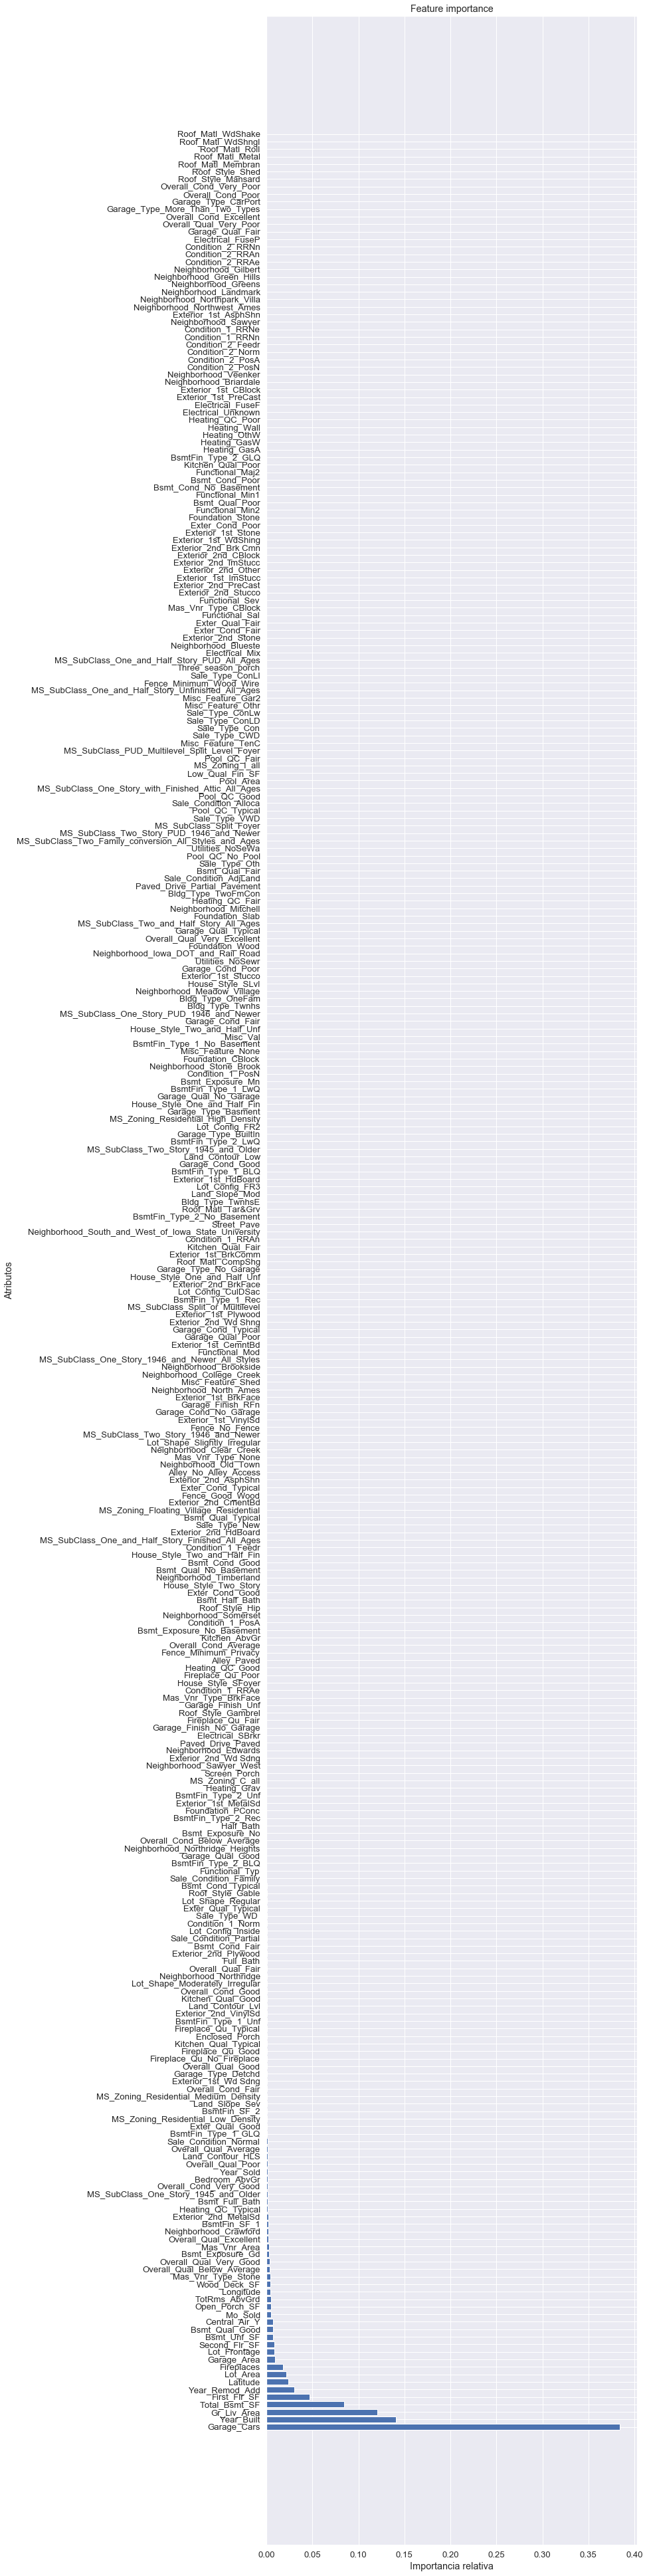

In [336]:
plt.figure(figsize=(10, 70))
afx.plot_importance(dec_tree, X_mat.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

In [338]:
df_model_2 = df_model[['Garage_Cars',
                       'Year_Built',
                       'Gr_Liv_Area',
                       'Total_Bsmt_SF',
                       'First_Flr_SF',
                       'Year_Remod_Add',
                       'Latitude',
                       'Lot_Area',
                       'Fireplaces',
                       'Garage_Area',
                       'Sale_Price'                       
                      ]]

In [339]:
df_model_2

,Garage_Cars,Year_Built,Gr_Liv_Area,Total_Bsmt_SF,First_Flr_SF,Year_Remod_Add,Latitude,Lot_Area,Fireplaces,Garage_Area,Sale_Price
0,2,1960,1656,1080,1656,1960,42.054035,31770,2,528,215000
1,1,1961,896,882,896,1961,42.053014,11622,0,730,105000
2,1,1958,1329,1329,1329,1958,42.052659,14267,0,312,172000
3,2,1968,2110,2110,2110,1968,42.051245,11160,2,522,244000
4,2,1997,1629,928,928,1998,42.060899,13830,1,482,189900
...,...,...,...,...,...,...,...,...,...,...,...
2925,2,1984,1003,1003,1003,1984,41.988964,7937,0,588,142500
2926,2,1983,902,864,902,1983,41.988314,8885,0,484,131000
2927,0,1992,970,912,970,1992,41.986510,10441,0,0,132000
2928,2,1974,1389,1389,1389,1975,41.990921,10010,1,418,170000


In [340]:
y_vec2 = df_model_2['Sale_Price']
X_mat2 = df_model_2.drop(['Sale_Price'],1)

In [341]:
X_train2, X_test2, y_train2, y_test2  = train_test_split(X_mat2,y_vec2,test_size = .3,random_state = 11)

In [356]:
%%time
dec_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(),
{'min_samples_split': np.linspace(0.1, 1.0,10),
'criterion': ['mse', 'friedman_mse', 'mae'],
'max_depth': np.linspace(1, 32, 32),
'min_samples_leaf': np.linspace(0.1, 0.5,10),
'max_features':list(range(1,X_train2.shape[1]))},cv=5, n_jobs=-1).fit(X_train2, y_train2)

Wall time: 23min 54s


In [359]:
dec_tree_grid_cv.best_params_

{'criterion': 'mae',
 'max_depth': 23.0,
 'max_features': 5,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

In [360]:
%%time
print("Test MSE:", mean_squared_error(y_test2,dec_tree_grid_cv.predict(X_test2)).round(5))
print("Test MAE:", median_absolute_error(y_test2,dec_tree_grid_cv.predict(X_test2)).round(5))
print("Test R2:", r2_score(y_test2, dec_tree_grid_cv.predict(X_test2)).round(5))

Test MSE: 2622770176.9636
Test MAE: 21000.0
Test R2: 0.583
Wall time: 6.97 ms


Es posible que el r2, sea más representativo, ya que con la búsqueda de diferentes hiperparámetros, es más seguro que el solo hecho de hacer una simulación con los parámetros por defecto, sin embargo, el MAE y MSE, aumentan aún más. Es posible que se requiera otro modelo para obtener resultados más confiables.